In [10]:
import os
import sys
sys.path.append("..")
import seaborn           as sns
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr


In [11]:
from scripts.util import *


In [12]:
# Reward distribution
df = pd.read_csv(os.path.join(RESULTS_DIRECTORY, "subjects_vs_random-agents.csv"))
df

,Subject,Reward,Random-Agent-Reward,T-test,P-value
0,1,0.6533,0.6200,0.5986,0.5499
1,2,0.5267,0.5267,0.0000,1.0000
2,3,0.5867,0.5867,0.0000,1.0000
3,5,0.4933,0.4200,1.2742,0.2036
4,6,0.5533,0.5333,0.3466,0.7291
...,...,...,...,...,...
89,96,0.4800,0.4800,0.0000,1.0000
90,97,0.6667,0.6267,0.7229,0.4703
91,98,0.5200,0.5600,-0.6933,0.4887
92,99,0.6467,0.5333,2.0023,0.0462


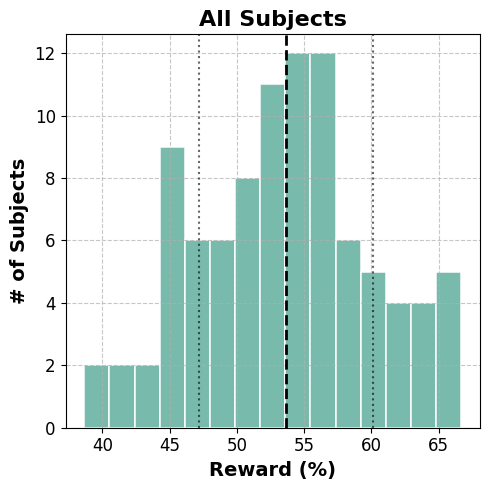

In [28]:
plt.figure(figsize=(5, 5), dpi=100)

rewards = df['Reward'] * 100

# Calculate statistics
mean_val = np.mean(rewards)
median_val = np.median(rewards)
std_val = np.std(rewards)

# Main histogram
n, bins, patches = plt.hist(rewards, bins=15, color='#69b3a2',
                            edgecolor='white', linewidth=1.2, alpha=0.9)

# Plot stats
plt.axvline(mean_val, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
# Optional: ±1 std deviation lines
plt.axvline(mean_val + std_val, color='black', linestyle=':', alpha=0.6)
plt.axvline(mean_val - std_val, color='black', linestyle=':', alpha=0.6)
    
# Aesthetic settings
plt.title('All Subjects', fontsize=16, weight='bold')
plt.xlabel("Reward (%)", fontsize=14, fontweight='bold')
plt.ylabel("# of Subjects", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIRECTORY, "reward_distribution.png"), dpi=300)

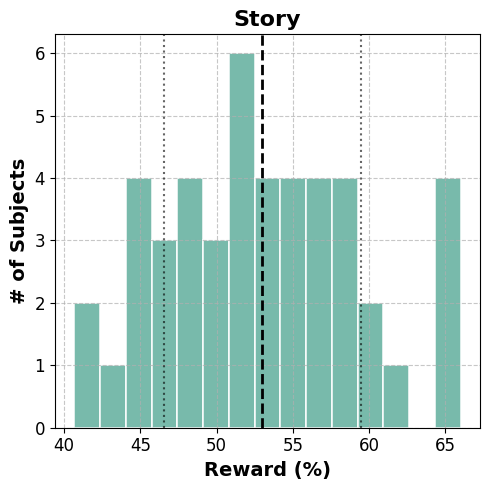

In [27]:
plt.figure(figsize=(5, 5), dpi=100)

subjects = get_story_subjects()


rewards = df[df['Subject'].isin(subjects)]['Reward'] * 100

# Calculate statistics
mean_val = np.mean(rewards)
median_val = np.median(rewards)
std_val = np.std(rewards)

# Main histogram
n, bins, patches = plt.hist(rewards, bins=15, color='#69b3a2',
                            edgecolor='white', linewidth=1.2, alpha=0.9)

# Plot stats
plt.axvline(mean_val, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
# Optional: ±1 std deviation lines
plt.axvline(mean_val + std_val, color='black', linestyle=':', alpha=0.6)
plt.axvline(mean_val - std_val, color='black', linestyle=':', alpha=0.6)
    
# Aesthetic settings
plt.title('Story', fontsize=16, weight='bold')
plt.xlabel("Reward (%)", fontsize=14, fontweight='bold')
plt.ylabel("# of Subjects", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIRECTORY, "reward_distribution_story.png"), dpi=300)

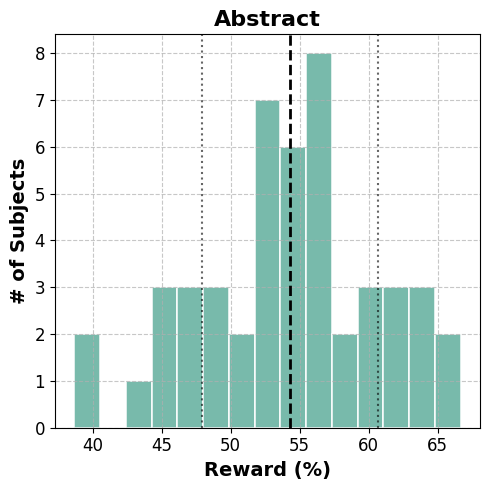

In [26]:
plt.figure(figsize=(5, 5), dpi=100)

subjects = get_abstract_subjects()


rewards = df[df['Subject'].isin(subjects)]['Reward'] * 100

# Calculate statistics
mean_val = np.mean(rewards)
median_val = np.median(rewards)
std_val = np.std(rewards)

# Main histogram
n, bins, patches = plt.hist(rewards, bins=15, color='#69b3a2',
                            edgecolor='white', linewidth=1.2, alpha=0.9)

# Plot stats
plt.axvline(mean_val, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
# Optional: ±1 std deviation lines
plt.axvline(mean_val + std_val, color='black', linestyle=':', alpha=0.6)
plt.axvline(mean_val - std_val, color='black', linestyle=':', alpha=0.6)
    
# Aesthetic settings
plt.title('Abstract', fontsize=16, weight='bold')
plt.xlabel("Reward (%)", fontsize=14, fontweight='bold')
plt.ylabel("# of Subjects", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIRECTORY, "reward_distribution_abstract.png"), dpi=300)

T-test: t = 0.976, p = 0.332


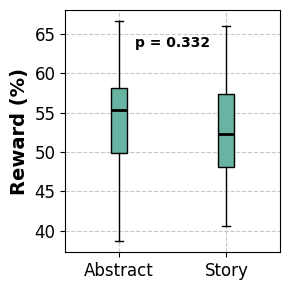

In [13]:
plt.figure(figsize=(3, 3), dpi=100)

abstract_rewards = df[df['Subject'].isin(get_abstract_subjects())]['Reward'] * 100
story_rewards    = df[df['Subject'].isin(get_story_subjects())]['Reward'] * 100

data = [abstract_rewards, story_rewards]
labels = ['Abstract', 'Story']
boxprops = dict(facecolor='#69b3a2', color='black')
medianprops = dict(color='black', linewidth=2)

plt.boxplot(data, tick_labels=labels, patch_artist=True,
            boxprops=boxprops, medianprops=medianprops)

plt.title('', fontsize=16, weight='bold')
plt.ylabel("Reward (%)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Run t-test
t_stat, p_val = ttest_ind(abstract_rewards, story_rewards, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# Optional: annotate plot with p-value
plt.text(1.5, max(max(abstract_rewards), max(story_rewards)) * 0.95,
         f'p = {p_val:.3f}', ha='center', fontsize=10, weight='bold')

plt.savefig(os.path.join(PLOTS_DIRECTORY, "reward_distribution_boxplot.png"), dpi=300)


T-test: t = 0.045, p = 0.964


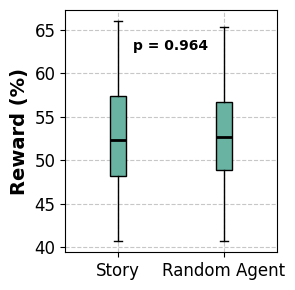

In [15]:
plt.figure(figsize=(3, 3), dpi=100)

story_rewards = df[df['Subject'].isin(get_story_subjects())]['Reward'] * 100
ra_rewards    = df[df['Subject'].isin(get_story_subjects())]['Random-Agent-Reward'] * 100

data = [story_rewards, ra_rewards]
labels = ['Story', 'Random Agent']
boxprops = dict(facecolor='#69b3a2', color='black')
medianprops = dict(color='black', linewidth=2)

plt.boxplot(data, tick_labels=labels, patch_artist=True,
            boxprops=boxprops, medianprops=medianprops)

plt.title('', fontsize=16, weight='bold')
plt.ylabel("Reward (%)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Run t-test
t_stat, p_val = ttest_ind(story_rewards, ra_rewards, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# Optional: annotate plot with p-value
plt.text(1.5, max(max(story_rewards), max(ra_rewards)) * 0.95,
         f'p = {p_val:.3f}', ha='center', fontsize=10, weight='bold')

plt.savefig(os.path.join(PLOTS_DIRECTORY, "reward_distribution_boxplot_ra.png"), dpi=300)

In [43]:
df = pd.read_csv(os.path.join(DATA_DIRECTORY, "questionnaire_data.csv"))
print(df)

    Subject  Understanding  Effort  Complexity  Reward
0         1              4       2           1  0.6533
1         2              4       1           2  0.5267
2         3              4       2           2  0.5867
3         5              4       1           2  0.4933
4         6              4       2           2  0.5533
..      ...            ...     ...         ...     ...
88       96              3       3           1  0.4800
89       97              3       2           1  0.6667
90       98              4       2           2  0.5200
91       99              4       3           1  0.6467
92      100              4       3           1  0.4800

[93 rows x 5 columns]


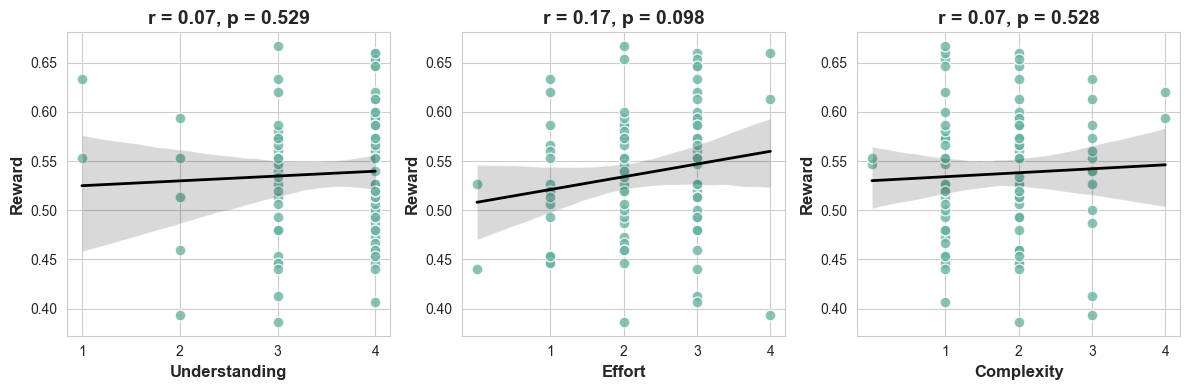

In [52]:
predictors = ['Understanding', 'Effort', 'Complexity']
outcome = 'Reward'
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4), dpi=100)
for i, predictor in enumerate(predictors):
    plt.subplot(1, len(predictors), i+1)
    sns.regplot(x=predictor, y=outcome, data=df,
                scatter_kws={'s': 60, 'color': '#69b3a2', 'edgecolor': 'white'},
                line_kws={'color': 'black', 'linewidth': 2})
    # Calculate correlation
    r, p = spearmanr(df[predictor], df[outcome])
    plt.title(f"r = {r:.2f}, p = {p:.3f}",
              fontsize=14, weight='bold')
    plt.xticks([1, 2, 3, 4])
    plt.xlabel(predictor, fontsize=12, weight='bold')
    plt.ylabel(outcome, fontsize=12, weight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIRECTORY, "correlation.png"), dpi=300)